In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
energy = pd.read_csv('energy_dataset.csv')

In [3]:
weather = pd.read_csv("weather_features.csv")

In [4]:
energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [5]:
energy.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation

In [6]:
energy.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [7]:
energy.describe().T

,count,mean,std,min,25%,50%,75%,max
generation biomass,35045.0,383.513540,85.353943,0.00,333.0000,367.00,433.00,592.00
generation fossil brown coal/lignite,35046.0,448.059208,354.568590,0.00,0.0000,509.00,757.00,999.00
generation fossil coal-derived gas,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation fossil gas,35046.0,5622.737488,2201.830478,0.00,4126.0000,4969.00,6429.00,20034.00
generation fossil hard coal,35046.0,4256.065742,1961.601013,0.00,2527.0000,4474.00,5838.75,8359.00
generation fossil oil,35045.0,298.319789,52.520673,0.00,263.0000,300.00,330.00,449.00
generation fossil oil shale,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation fossil peat,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation geothermal,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation hydro pumped storage aggregated,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


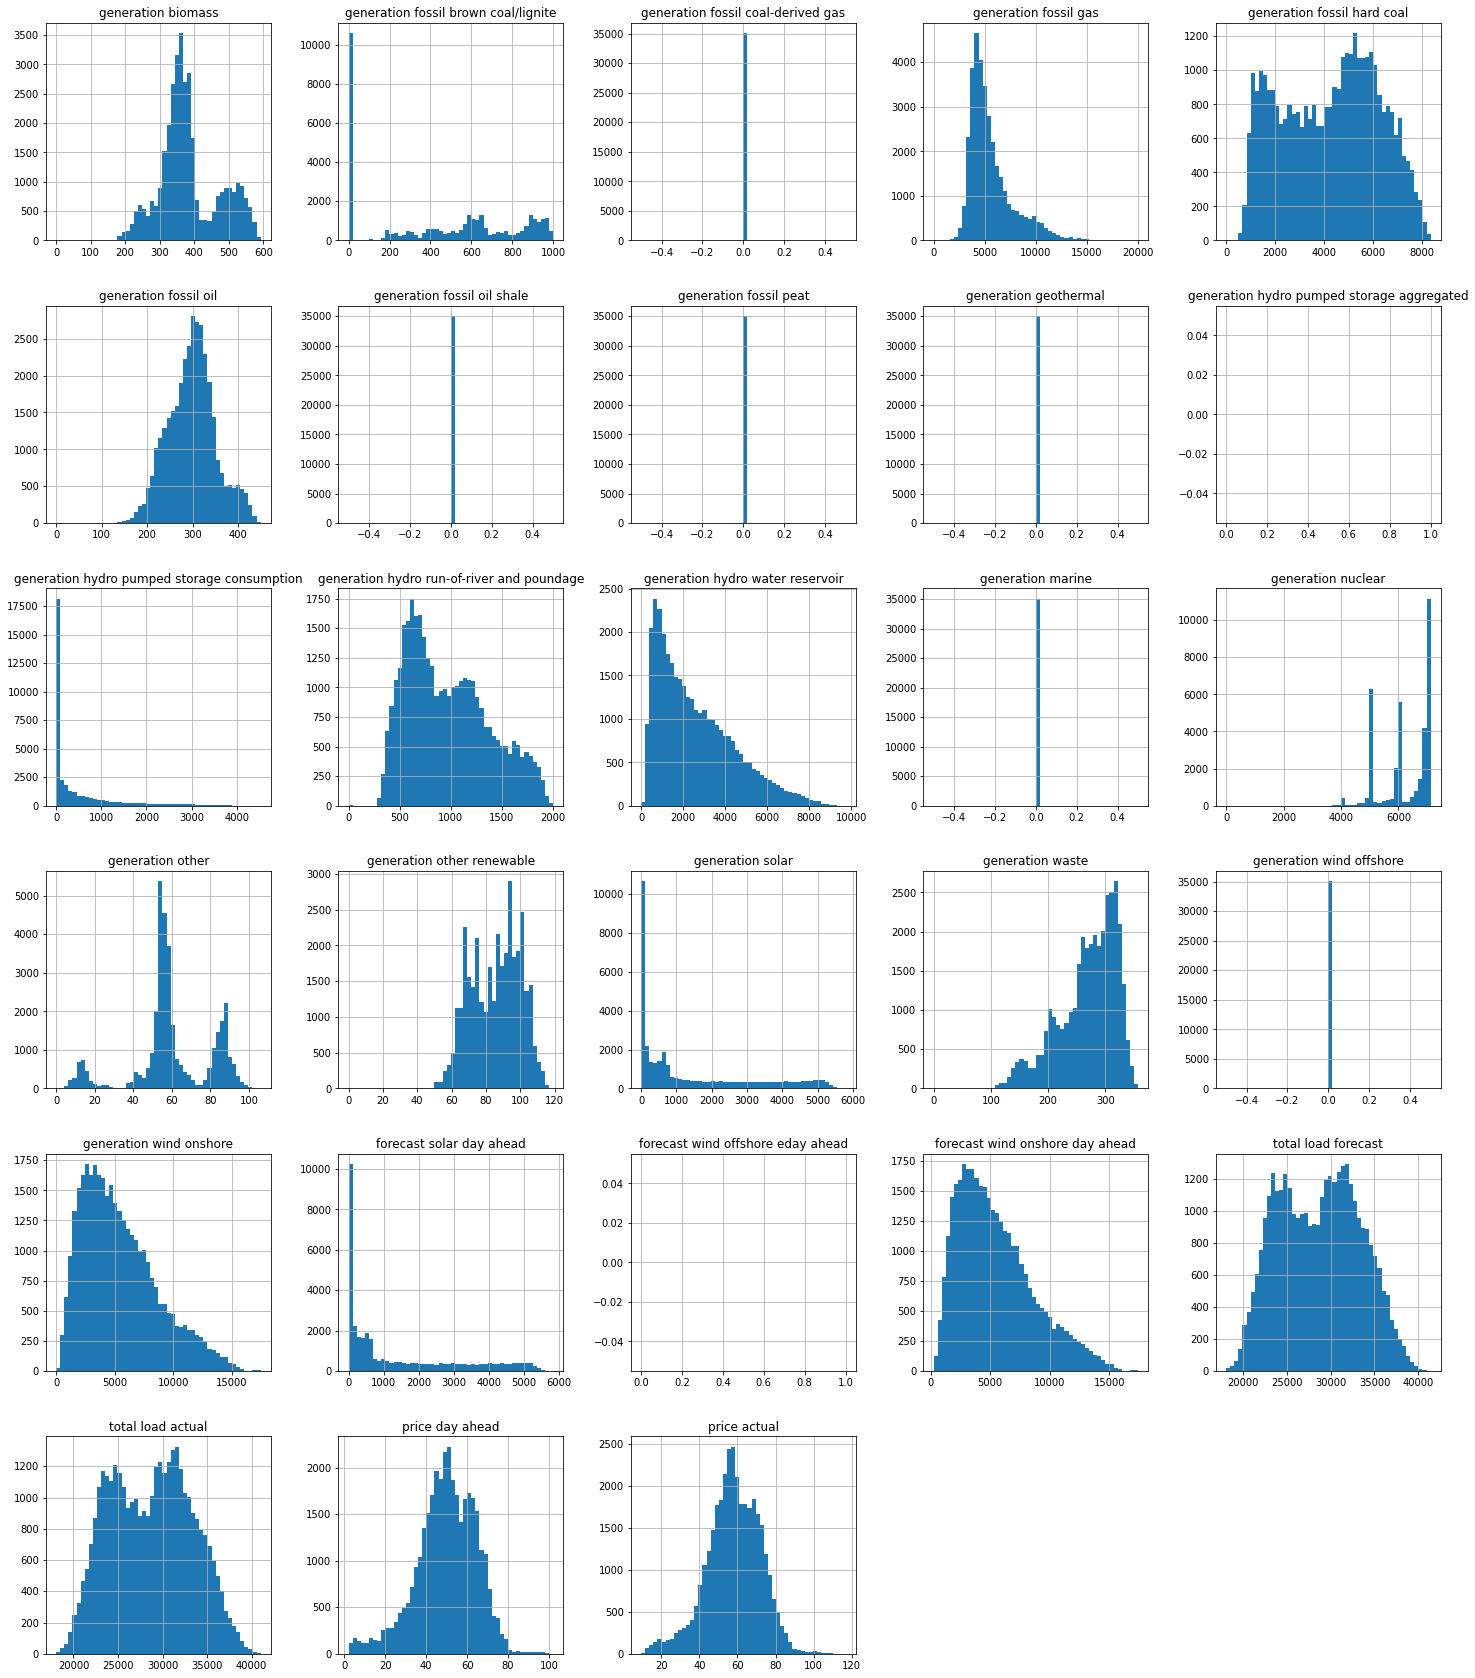

In [8]:
energy.hist(figsize=(25, 30), bins=50, xlabelsize=10, ylabelsize=10)
plt.show()

In [9]:
cols = ['generation fossil peat','generation marine', 'generation geothermal','generation hydro pumped storage aggregated','generation wind offshore','generation fossil oil shale',
        'forecast wind offshore eday ahead',
        'generation fossil coal-derived gas']
energy = energy.drop(columns=cols, axis=1)

In [10]:
energy = energy.drop('price day ahead', axis=1)

In [11]:
import seaborn as sns

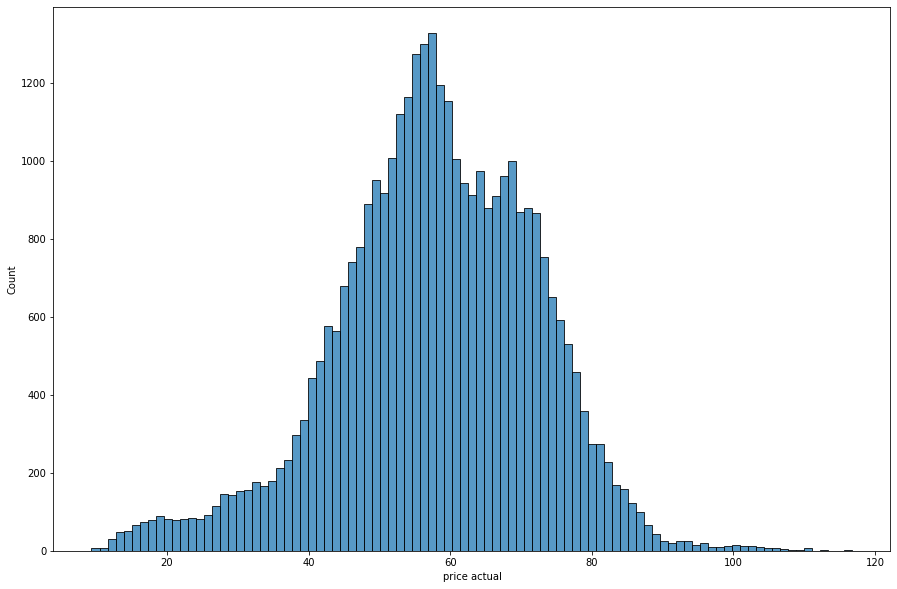

In [12]:
plt.figure(figsize=(15,10))
sns.histplot(energy,x='price actual');

In [13]:
weather.dtypes

dt_iso                  object
city_name               object
temp                   float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed               int64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [14]:
weather.isnull().sum()

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

In [15]:
weather.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dt_iso,178396,35064,2015-10-01 02:00:00+02:00,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_name,178396,5,Madrid,36267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,178396.0,NaN,NaN,NaN,289.618605,8.026199,262.24,283.67,289.15,295.15,315.6
temp_min,178396.0,NaN,NaN,NaN,288.330442,7.955491,262.24,282.483602,288.15,293.730125,315.15
temp_max,178396.0,NaN,NaN,NaN,291.091267,8.612454,262.24,284.65,290.15,297.15,321.15
pressure,178396.0,NaN,NaN,NaN,1069.26074,5969.631893,0.0,1013.0,1018.0,1022.0,1008371.0
humidity,178396.0,NaN,NaN,NaN,68.423457,21.902888,0.0,53.0,72.0,87.0,100.0
wind_speed,178396.0,NaN,NaN,NaN,2.47056,2.09591,0.0,1.0,2.0,4.0,133.0
wind_deg,178396.0,NaN,NaN,NaN,166.59119,116.611927,0.0,55.0,177.0,270.0,360.0
rain_1h,178396.0,NaN,NaN,NaN,0.075492,0.398847,0.0,0.0,0.0,0.0,12.0


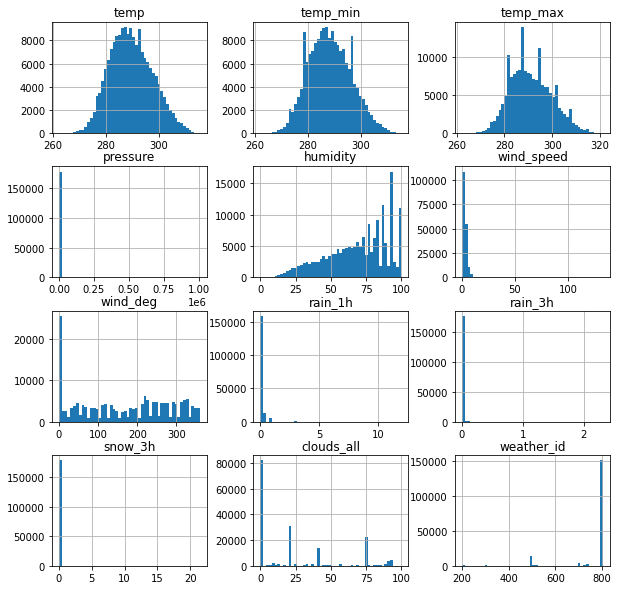

In [16]:
weather.hist(figsize=(10, 10), bins=50, xlabelsize=10, ylabelsize=10)
plt.show()

In [17]:
col_zero = ['pressure','rain_3h','snow_3h']
weather = weather.drop(columns=col_zero, axis=1)

### Descriptive analysis for time series

In [18]:
energy['time'] = pd.to_datetime(energy['time'], utc=True, infer_datetime_format=True)
energy = energy.set_index('time')

In [19]:
price_actual = energy['price actual']

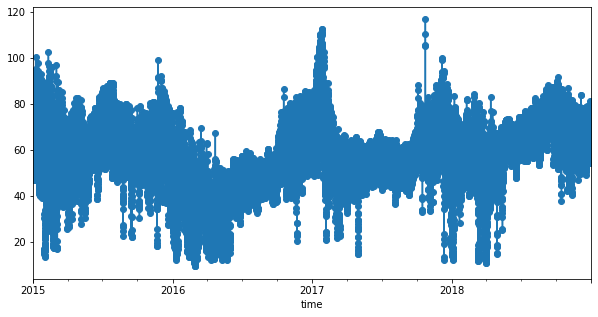

In [20]:
price_actual.plot(style="-o", figsize=(10, 5));

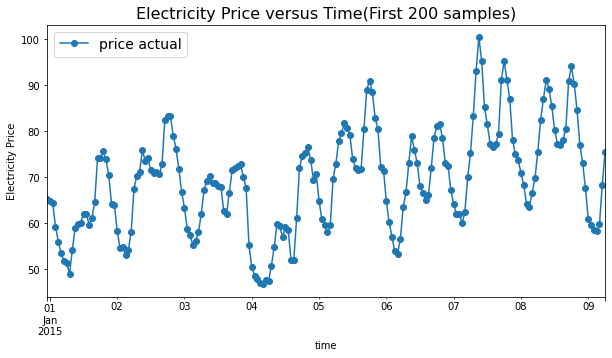

In [21]:
price_actual[:200].plot(style="-o",figsize=(10, 5))
plt.ylabel("Electricity Price")
plt.title("Electricity Price versus Time(First 200 samples)", fontsize=16)
plt.legend(fontsize=14);

In [22]:
monthly_electric_price = energy['price actual'].asfreq('M')

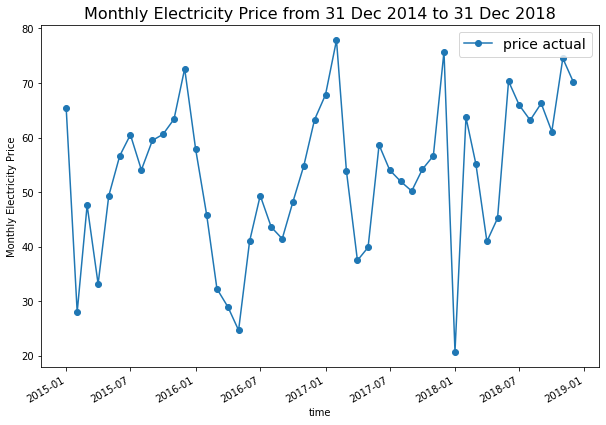

In [23]:
monthly_electric_price.plot(style="-o",figsize=(10, 7))
plt.ylabel("Monthly Electricity Price")
plt.title("Monthly Electricity Price from 31 Dec 2014 to 31 Dec 2018", fontsize=16)
plt.legend(fontsize=14);

In [24]:
conda install statsmodels

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
y=monthly_electric_price

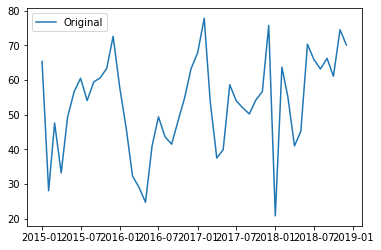

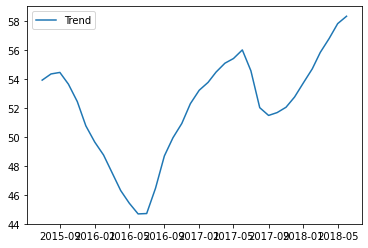

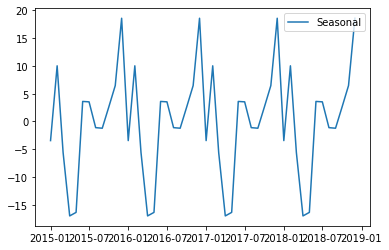

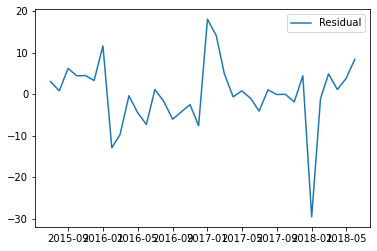

In [27]:
decomposition = seasonal_decompose(monthly_electric_price)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'upper right')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

In [28]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(energy['price actual'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.147016
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [29]:
energy['total supply'] = energy['generation biomass']+energy['generation fossil gas']+energy['generation fossil brown coal/lignite']+energy['generation fossil hard coal']+energy['generation fossil oil']+energy['generation hydro pumped storage consumption']+energy['generation hydro run-of-river and poundage']+energy['generation hydro water reservoir']+energy['generation nuclear']+energy['generation other']+energy['generation other renewable']+energy['generation solar']+energy['generation waste']+energy['generation wind onshore']

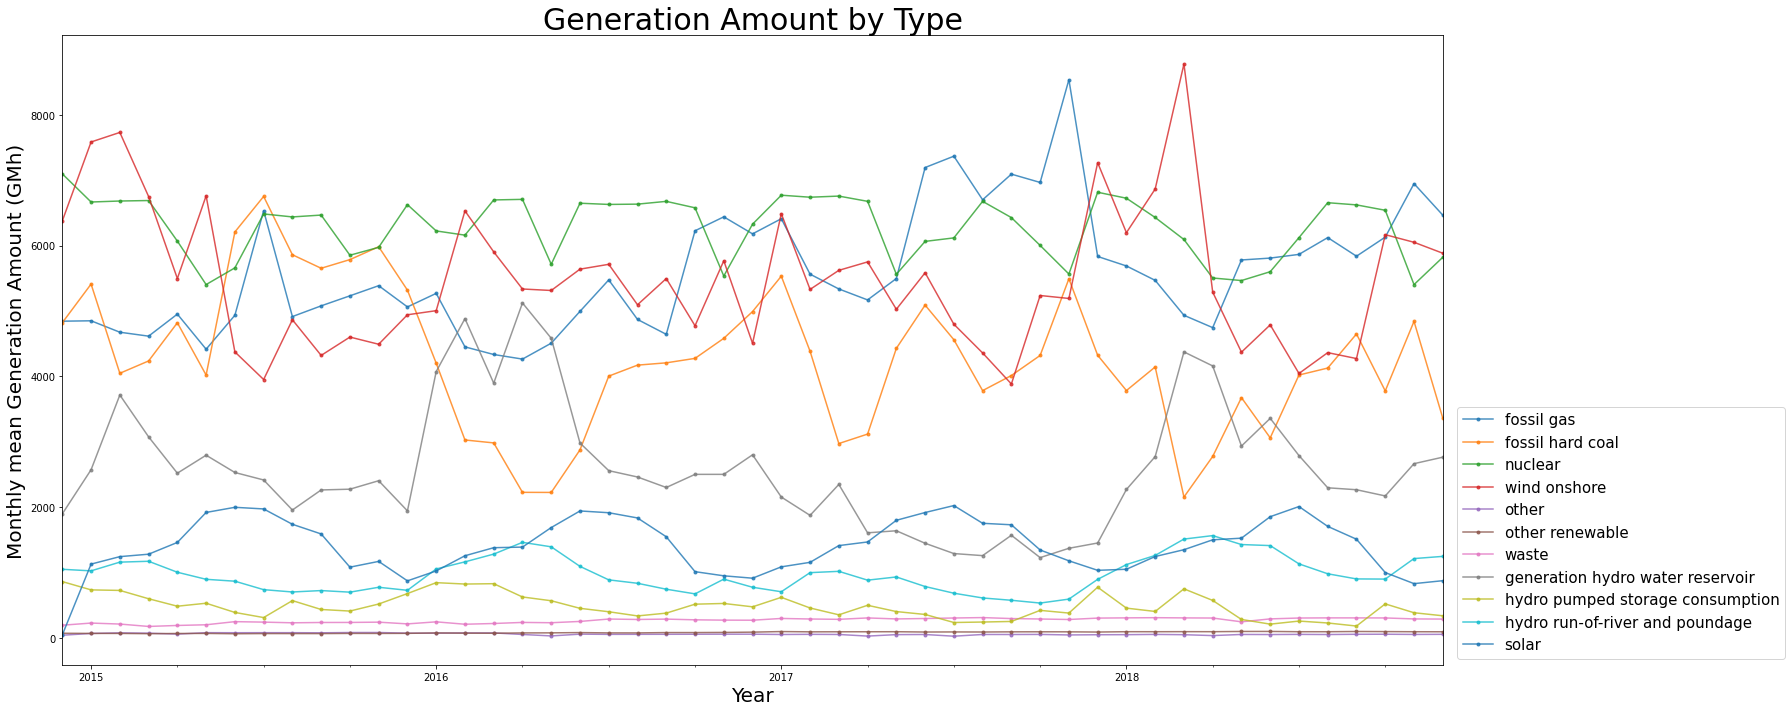

In [30]:
axes = energy['generation fossil gas'].resample("M").mean().plot(marker='.', alpha=0.8,  figsize=(25,10), label='fossil gas')
axes = energy['generation fossil hard coal'].resample("M").mean().plot(marker='.', alpha=0.8,  figsize=(25,10), label='fossil hard coal')
axes = energy['generation nuclear'].resample("M").mean().plot(marker='.', alpha=0.8,  figsize=(25,10), label='nuclear')
axes = energy['generation wind onshore'].resample("M").mean().plot(marker='.', alpha=0.8,  figsize=(25,10), label='wind onshore')


axes = energy['generation other'].resample("M").mean().plot(marker='.', alpha=0.8,  figsize=(25,10), label='other')
axes = energy['generation other renewable'].resample("M").mean().plot(marker='.', alpha=0.8,  figsize=(25,10), label='other renewable')
axes = energy['generation waste'].resample("M").mean().plot(marker='.', alpha=0.8,  figsize=(25,10), label='waste')
axes = energy['generation hydro water reservoir'].resample("M").mean().plot(marker='.', alpha=0.8,  figsize=(25,10), label='generation hydro water reservoir')
axes = energy['generation hydro pumped storage consumption'].resample("M").mean().plot(marker='.', alpha=0.8,  figsize=(25,10), label='hydro pumped storage consumption')
axes = energy['generation hydro run-of-river and poundage'].resample("M").mean().plot(marker='.', alpha=0.8,  figsize=(25,10), label='hydro run-of-river and poundage')
axes = energy['generation solar'].resample("M").mean().plot(marker='.', alpha=0.8,  figsize=(25,10), label='solar')

axes.legend(loc='upper right', frameon=False, fontsize=30)
axes.set_title('Generation Amount by Type', fontsize=30)
axes.set_ylabel('Monthly mean Generation Amount (GMh)', fontsize=20)
axes.set_xlabel("Year", fontsize=20)
axes.legend(loc=(1.01, .01), ncol=1, fontsize=15)
plt.tight_layout()

In [31]:
# Calculate the percentages
print('Ordered percentage of total power generated over the 4 years by each source ')
print()
print("generation nuclear                         ",round((energy['generation nuclear'].sum()/energy['total supply'].sum())*100,1),'%')
print("generation fossil gas                      ",round((energy['generation fossil gas'].sum()/energy['total supply'].sum())*100,1),'%')
print('generation wind onshore                    ',round((energy['generation wind onshore'].sum()/energy['total supply'].sum())*100,1),'%')
print("generation fossil hard coal                ",round((energy['generation fossil hard coal'].sum()/energy['total supply'].sum())*100,1),'%')
print('generation hydro water reservoir            ',round((energy['generation hydro water reservoir'].sum()/energy['total supply'].sum())*100,1),'%')
print('generation solar                            ',round((energy['generation solar'].sum()/energy['total supply'].sum())*100,1),'%')
print('generation hydro run-of-river and poundage  ',round((energy['generation hydro run-of-river and poundage'].sum()/energy['total supply'].sum())*100,1),'%')
print('generation hydro pumped storage consumption ',round((energy['generation hydro pumped storage consumption'].sum()/energy['total supply'].sum())*100,1),'%')
print('generation waste                            ',round((energy['generation waste'].sum()/energy['total supply'].sum())*100,1),'%')
print('generation other renewable                  ',round((energy['generation other renewable'].sum()/energy['total supply'].sum())*100,1),'%')
print('generation other                            ',round((energy['generation other'].sum()/energy['total supply'].sum())*100,1),'%')

Ordered percentage of total power generated over the 4 years by each source 

generation nuclear                          21.9 %
generation fossil gas                       19.6 %
generation wind onshore                     19.1 %
generation fossil hard coal                 14.9 %
generation hydro water reservoir             9.1 %
generation solar                             5.0 %
generation hydro run-of-river and poundage   3.4 %
generation hydro pumped storage consumption  1.7 %
generation waste                             0.9 %
generation other renewable                   0.3 %
generation other                             0.2 %


## Deal with missing values

In [32]:
energy = energy.fillna(method='ffill')

In [33]:
energy.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price actual                                   0
total supply                                   0
dtype: int64

## Deal with outliers

In [34]:
df1=energy.select_dtypes(exclude=['object'])

In [35]:
import seaborn as sns

In [36]:
plt.rcParams.update({'figure.max_open_warning': 0})

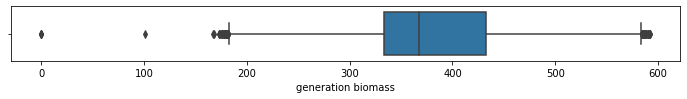

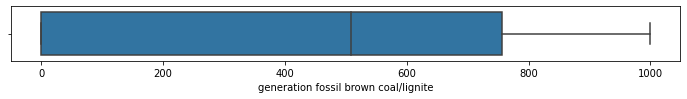

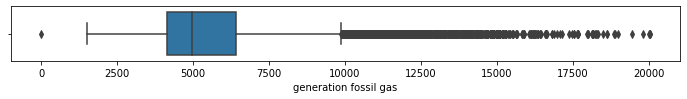

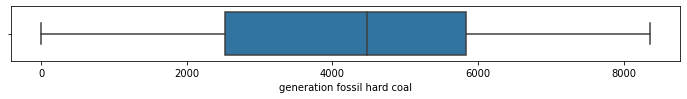

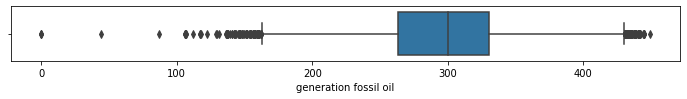

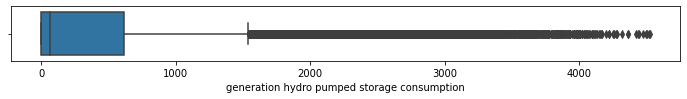

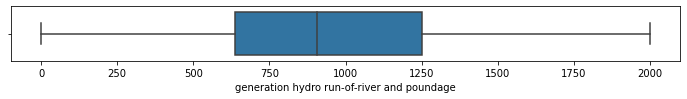

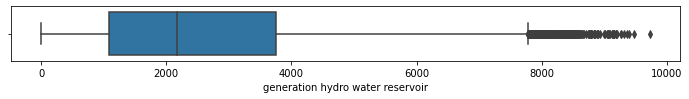

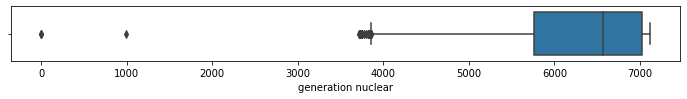

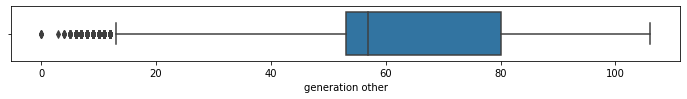

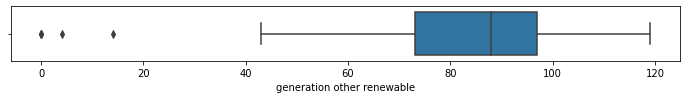

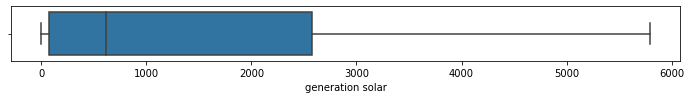

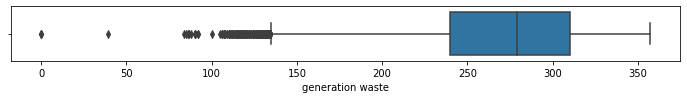

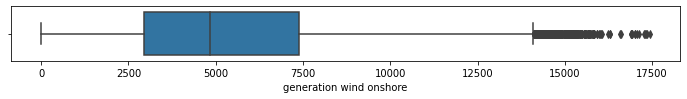

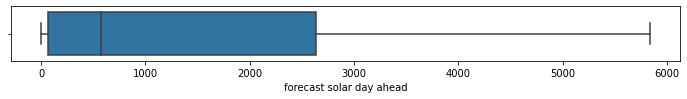

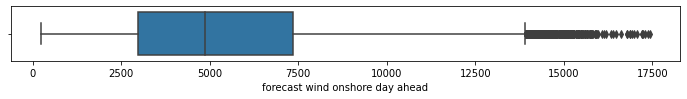

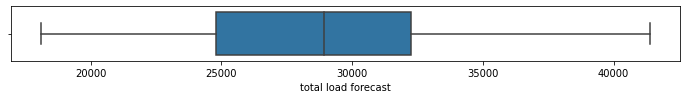

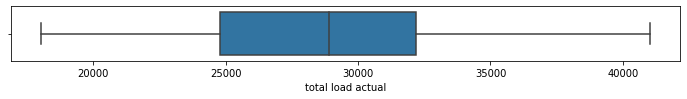

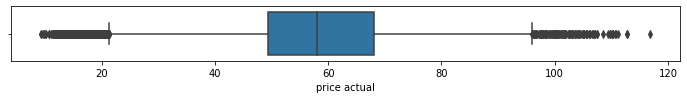

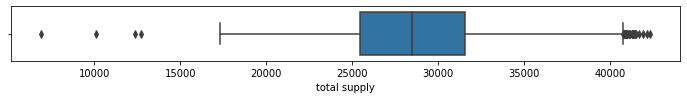

In [37]:
for column in df1:
        plt.figure(figsize=(12,1))
        sns.boxplot(data=energy, x=column)

In [38]:
Q1 = energy.quantile(0.25)
Q3 = energy.quantile(0.75)
IQR = Q3 - Q1
((energy < (Q1 - 1.5 * IQR)) | (energy > (Q3 + 1.5 * IQR))).sum()

generation biomass                               87
generation fossil brown coal/lignite              0
generation fossil gas                          2185
generation fossil hard coal                       0
generation fossil oil                           246
generation hydro pumped storage consumption    3762
generation hydro run-of-river and poundage        0
generation hydro water reservoir                343
generation nuclear                               79
generation other                               1267
generation other renewable                        5
generation solar                                  0
generation waste                                328
generation wind onshore                         377
forecast solar day ahead                          0
forecast wind onshore day ahead                 436
total load forecast                               0
total load actual                                 0
price actual                                    699
total supply

In [39]:
energy_out = energy[~((energy < (Q1 - 1.5 * IQR)) |(energy > (Q3 + 1.5 * IQR))).any(axis=1)]
print(energy_out.shape)

(26815, 20)


In [40]:
print(energy['generation biomass'].quantile(0.50)) 
print(energy['generation biomass'].quantile(0.95)) 

367.0
543.0


In [41]:
energy['generation biomass'] = np.where(energy['generation biomass'] > 543, 367, energy['generation biomass'])

In [42]:
energy[0:-1] = np.where((energy[0:-1] < (Q1 - 1.5 * IQR)) | (energy[0:-1] > (Q3 + 1.5 * IQR)),energy[0:-1].quantile(0.50), energy[0:-1])

In [43]:
energy.describe().T

,count,mean,std,min,25%,50%,75%,max
generation biomass,35064.0,374.291267,74.906746,183.00,333.00,367.00,398.0000,543.00
generation fossil brown coal/lignite,35064.0,448.091918,354.616732,0.00,0.00,509.00,757.0000,999.00
generation fossil gas,35064.0,5213.461214,1532.917020,1518.00,4126.00,4969.00,5924.0000,9882.00
generation fossil hard coal,35064.0,4256.550622,1961.973297,0.00,2527.00,4475.00,5839.0000,8359.00
generation fossil oil,35064.0,298.270791,51.053241,163.00,263.00,300.00,329.0000,430.00
generation hydro pumped storage consumption,35064.0,222.360398,356.780707,0.00,0.00,68.00,289.0000,1540.00
generation hydro run-of-river and poundage,35064.0,972.206337,400.714694,0.00,637.00,906.00,1250.0000,2000.00
generation hydro water reservoir,35064.0,2545.846138,1746.777833,0.00,1078.00,2165.00,3679.0000,7775.00
generation nuclear,35064.0,6270.212041,829.849468,3862.00,5790.75,6564.00,7025.0000,7117.00
generation other,35064.0,61.924538,17.768134,13.00,54.00,57.00,80.0000,106.00


In [44]:
df2=weather.select_dtypes(exclude=['object'])

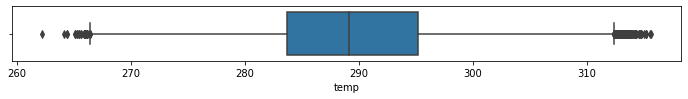

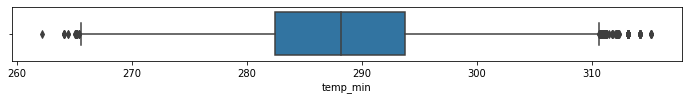

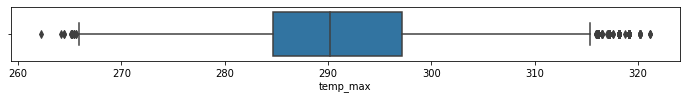

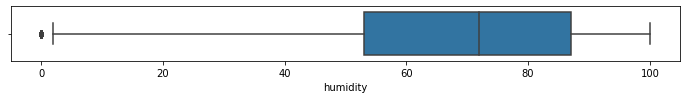

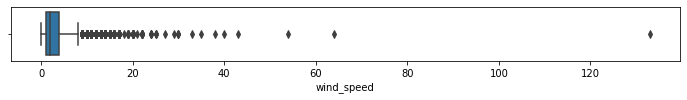

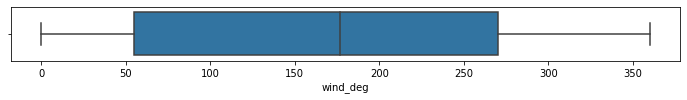

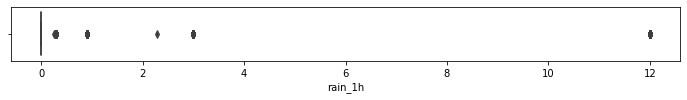

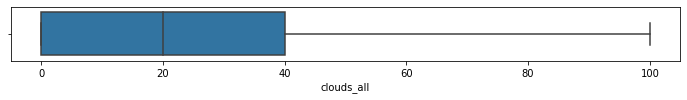

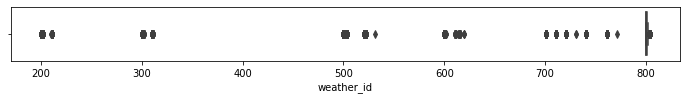

In [45]:
 for column in df2:
        plt.figure(figsize=(12,1))
        sns.boxplot(data=weather, x=column)

In [46]:
weather.loc[weather.wind_speed > 50, 'wind_speed'] = np.nan

In [47]:
weather.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [48]:
weather['time'] = pd.to_datetime(weather['dt_iso'], utc=True, infer_datetime_format=True)
weather = weather.drop(['dt_iso'], axis=1)
weather = weather.set_index('time')

In [49]:
def df_convert_dtypes(df, convert_from, convert_to):
    cols = df.select_dtypes(include=[convert_from]).columns
    for col in cols:
        df[col] = df[col].values.astype(convert_to)
    return df

In [50]:
weather = df_convert_dtypes(weather, np.int64, np.float64)

In [51]:
print('There are {} missing values or NaNs in df_weather.'
      .format(weather.isnull().values.sum()))

temp_weather = weather.duplicated(keep='first').sum()

print('There are {} duplicate rows in df_weather based on all columns.'
      .format(temp_weather))

There are 0 missing values or NaNs in df_weather.
There are 13171 duplicate rows in df_weather based on all columns.


In [52]:
weather_2 = weather.reset_index().drop_duplicates(subset=['time', 'city_name'], 
                                                        keep='last').set_index('time')

weather = weather.reset_index().drop_duplicates(subset=['time', 'city_name'],
                                                      keep='first').set_index('time')

Reference: Kaggle (https://www.kaggle.com/code/dimitriosroussis/electricity-price-forecasting-with-dnns-eda)

### Handling categorical data

In [53]:
uniqval_weather_des = weather['weather_description'].unique()
uniqval_weather_des

array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain',
       'heavy intensity rain', 'mist', 'heavy intensity shower rain',
       'shower rain', 'very heavy rain', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'proximity thunderstorm',
       'thunderstorm', 'light intensity shower rain',
       'light intensity drizzle', 'thunderstorm with rain', 'fog',
       'smoke', 'drizzle', 'heavy intensity drizzle', 'haze',
       'proximity shower rain', 'light snow', 'rain and snow',
       'light rain and snow', 'snow', 'sleet', 'rain and drizzle',
       'light intensity drizzle rain', 'light shower snow',
       'proximity moderate rain', 'ragged shower rain', 'heavy snow',
       'sand dust whirls', 'proximity drizzle', 'dust',
       'light thunderstorm', 'squalls'], dtype=object)

In [54]:
uniqval_weather_main = weather['weather_main'].unique()
uniqval_weather_main

array(['clear', 'clouds', 'rain', 'mist', 'thunderstorm', 'drizzle',
       'fog', 'smoke', 'haze', 'snow', 'dust', 'squall'], dtype=object)

In [55]:
uniqval_weather_icon = weather['weather_icon'].unique()
uniqval_weather_icon

array(['01n', '01d', '01', '02n', '02d', '02', '03', '04n', '04', '10n',
       '03n', '10', '04d', '03d', '10d', '50d', '09n', '11d', '11n',
       '09d', '50n', '13d', '13n', '13'], dtype=object)

In [56]:
uniqval_weather_id = weather['weather_id'].unique()
uniqval_weather_id

array([800., 801., 802., 803., 804., 500., 501., 502., 701., 522., 521.,
       503., 202., 200., 211., 520., 300., 201., 741., 711., 301., 302.,
       721., 600., 616., 615., 601., 611., 311., 310., 620., 531., 602.,
       731., 761., 210., 771.])

In [57]:
weather = weather.drop(['weather_main', 'weather_description', 'weather_icon'], axis=1)

In [58]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [59]:
ohe.fit(weather[['weather_id']])

OneHotEncoder(sparse=False)

In [60]:
ohe.transform(weather[['weather_id']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Marge the two dataset

In [61]:
df_1, df_2, df_3, df_4, df_5 = [x for _, x in weather.groupby('city_name')]
dfs = [df_1, df_2, df_3, df_4, df_5]

In [62]:
# Merge all dataframes into the final dataframe

final_df = energy

for df in dfs:
    city = df['city_name'].unique()
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
    df = df.add_suffix('_{}'.format(city_str))
    final_df = final_df.merge(df, on=['time'], how='outer')
    final_df = final_df.drop('city_name_{}'.format(city_str), axis=1)
    
final_df.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price actual',
       'total supply', 'temp_Barcelona', 'temp_min_Barcelona',
       'temp_max_Barcelona', 'humidity_Barcelona', 'wind_speed_Barcelona',
       'wind_deg_Barcelona', 'rain_1h_Barcelona', 'clouds_all_Barcelona',
       'weather_id_Barcelona', 'temp_Bilbao', 'temp_min_Bilbao',
       'temp_max_Bilbao', 'humidity_Bilbao', 'wind_speed_Bilbao',
       'wind_deg_Bilbao', 'rain_1h_Bilbao', 'clouds_all_Bilb

In [63]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
generation biomass,35064.0,374.291267,74.906746,183.0,333.0,367.0,398.0,543.0
generation fossil brown coal/lignite,35064.0,448.091918,354.616732,0.0,0.0,509.0,757.0,999.0
generation fossil gas,35064.0,5213.461214,1532.917020,1518.0,4126.0,4969.0,5924.0,9882.0
generation fossil hard coal,35064.0,4256.550622,1961.973297,0.0,2527.0,4475.0,5839.0,8359.0
generation fossil oil,35064.0,298.270791,51.053241,163.0,263.0,300.0,329.0,430.0
...,...,...,...,...,...,...,...,...
wind_speed_Valencia,35064.0,2.687300,2.459133,0.0,1.0,2.0,4.0,43.0
wind_deg_Valencia,35064.0,160.801648,120.412607,0.0,50.0,130.0,280.0,360.0
rain_1h_Valencia,35064.0,0.034458,0.263594,0.0,0.0,0.0,0.0,12.0
clouds_all_Valencia,35064.0,20.740475,25.604016,0.0,0.0,20.0,20.0,100.0


Reference: kaggle https://www.kaggle.com/code/dimitriosroussis/electricity-price-forecasting-with-dnns-eda

### Correlation analysis

In [64]:
final_df["wind load ratio"] = final_df["generation wind onshore"]/final_df["total load actual"]


In [65]:
correlations = final_df.corr(method='pearson')
print(correlations['price actual'].sort_values(ascending=False).to_string())

price actual                                   1.000000
generation fossil hard coal                    0.439448
total load forecast                            0.413515
total load actual                              0.413367
generation fossil gas                          0.402507
generation fossil brown coal/lignite           0.346796
total supply                                   0.298334
generation fossil oil                          0.249792
generation other renewable                     0.224809
temp_min_Valencia                              0.133982
generation waste                               0.132075
forecast solar day ahead                       0.108687
generation solar                               0.104760
temp_min_Barcelona                             0.099769
generation hydro water reservoir               0.093802
temp_Valencia                                  0.091315
generation biomass                             0.089869
temp_max_Madrid                                0

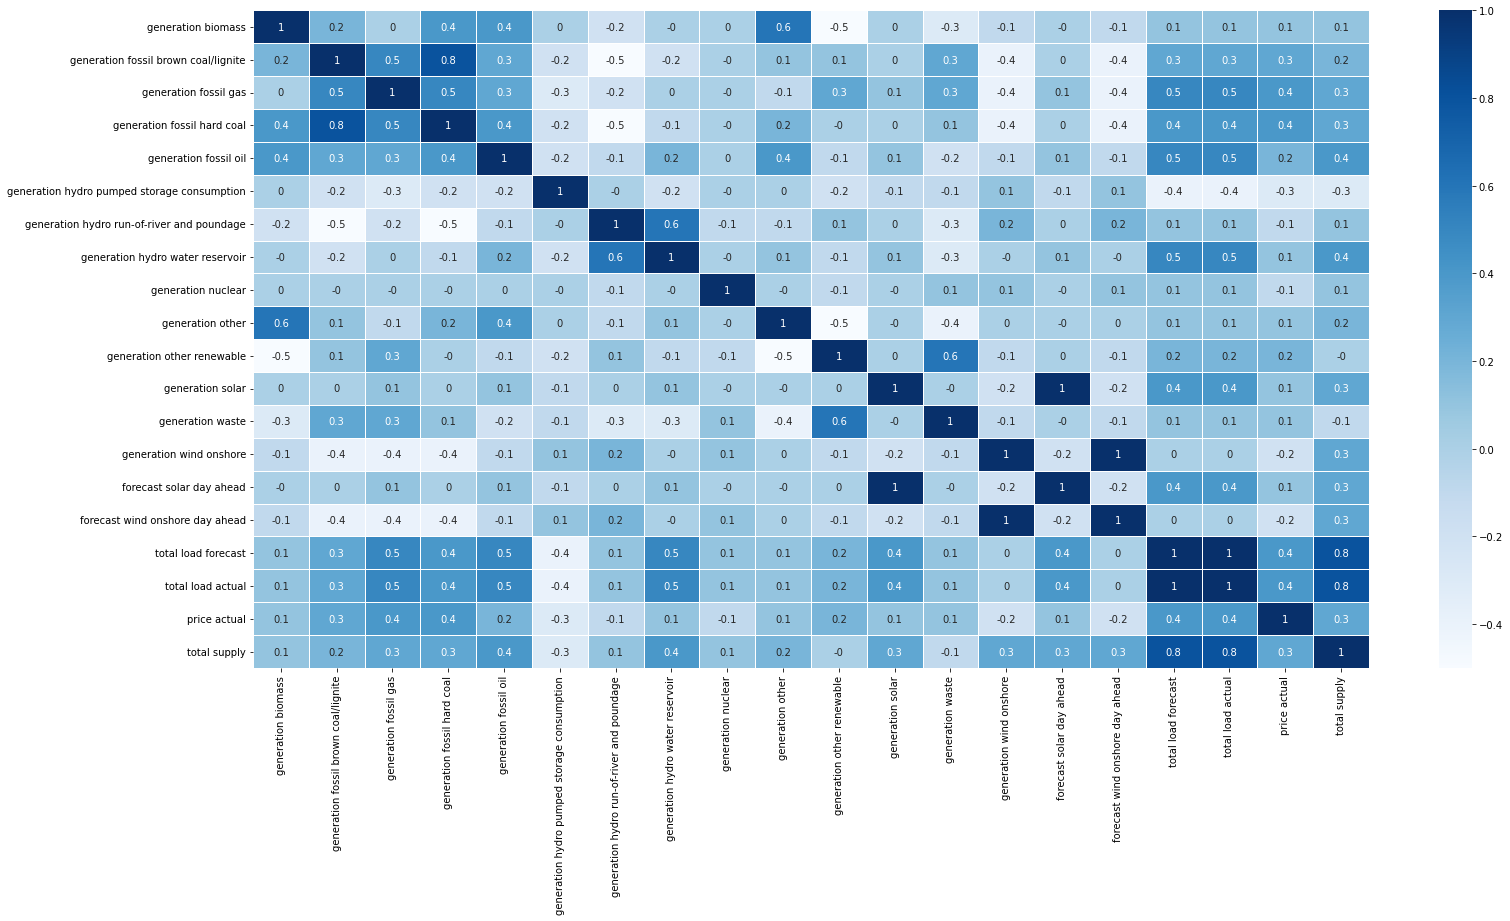

In [66]:
plt.figure(figsize=(25,12.10))
sns.heatmap(round(energy.corr(),1),annot=True,cmap='Blues',linewidth=0.9)
plt.show();

## Split data to train-test sets

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
y = final_df['price actual']
X = final_df.drop('price actual', axis=1)

In [69]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Split full training into training and val sets
# Make a 60-20-20 split
train_size = int(0.75 * X_train_full.shape[0])

In [71]:
X_train, X_val, y_train, y_val = X_train_full[:train_size], X_train_full[train_size:], y_train_full[:train_size], y_train_full[train_size:]

In [72]:
print(len(X_train),len(X_val),len(X_test))

21038 7013 7013


# Feature Engineering

## Feature selection

In [73]:
from sklearn.feature_selection import VarianceThreshold

In [74]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [75]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [76]:
constant_columns = [column for column in X_train.columns 
                   if column not in X_train.columns[var_thres.get_support()]]
print(len(constant_columns))

0


In [77]:
X_train.drop(constant_columns,axis=1)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,temp_Valencia,temp_min_Valencia,temp_max_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,clouds_all_Valencia,weather_id_Valencia,wind load ratio
time,,,,,,,,,,,,,,,,,,,,,
2016-08-16 00:00:00+00:00,381.0,42.0,4830.0,2694.0,230.0,0.0,688.0,1906.0,6953.0,55.0,...,294.82,293.15,296.75,92.0,0.0,135.0,0.0,48.0,802.0,0.153529
2018-04-23 07:00:00+00:00,298.0,0.0,5531.0,2202.0,285.0,0.0,1989.0,2165.0,5061.0,13.0,...,289.15,289.15,289.15,67.0,1.0,298.0,0.0,0.0,800.0,0.079921
2016-04-06 09:00:00+00:00,324.0,0.0,4328.0,1885.0,272.0,5.0,1465.0,5244.0,6068.0,57.0,...,289.84,288.15,291.35,67.0,5.0,320.0,0.0,75.0,803.0,0.047419
2015-01-26 15:00:00+00:00,466.0,965.0,5385.0,7563.0,318.0,0.0,1215.0,2801.0,7101.0,55.0,...,286.55,286.55,286.55,39.0,8.0,101.0,0.0,0.0,800.0,0.158075
2017-03-05 00:00:00+00:00,238.0,500.0,4315.0,4600.0,272.0,304.0,702.0,747.0,7008.0,57.0,...,280.15,280.15,280.15,70.0,1.0,0.0,0.0,0.0,800.0,0.135516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-11 21:00:00+00:00,328.0,833.0,7007.0,5220.0,301.0,158.0,630.0,816.0,5044.0,54.0,...,298.00,292.95,302.59,65.0,4.0,50.0,0.0,0.0,800.0,0.289101
2016-07-06 15:00:00+00:00,322.0,587.0,6208.0,5025.0,309.0,111.0,1348.0,2984.0,6051.0,58.0,...,303.79,299.82,305.93,45.0,5.0,120.0,0.0,0.0,800.0,0.101202
2017-11-07 16:00:00+00:00,398.0,766.0,4969.0,5821.0,343.0,76.0,760.0,794.0,5874.0,28.0,...,292.15,292.15,292.15,22.0,4.0,140.0,0.0,0.0,800.0,0.076522


## Feature scaling
Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

In [80]:
scaler.fit(X_train)

StandardScaler()

In [81]:
scaled_data = scaler.transform(X_train)

In [82]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [83]:
scaler.mean_

array([3.74370710e+02, 4.48565976e+02, 5.22093036e+03, 4.25952077e+03,
       2.98235336e+02, 2.22952467e+02, 9.71070634e+02, 2.54727636e+03,
       6.27397557e+03, 6.19358304e+01, 8.56964540e+01, 1.43157881e+03,
       2.70815287e+02, 5.33820748e+03, 1.43716071e+03, 5.33426889e+03,
       2.87113726e+04, 2.86936856e+04, 2.86021586e+04, 2.89832867e+02,
       2.88584744e+02, 2.91005495e+02, 7.38755110e+01, 2.76694553e+00,
       1.86988497e+02, 1.02386158e-01, 2.27950851e+01, 7.65132807e+02,
       2.86409174e+02, 2.84950393e+02, 2.88061711e+02, 7.87098108e+01,
       1.95175397e+00, 1.59542970e+02, 1.19455271e-01, 4.31979276e+01,
       7.28250499e+02, 2.88230593e+02, 2.86998108e+02, 2.89324071e+02,
       5.88319707e+01, 2.40997243e+00, 1.72302025e+02, 4.21522958e-02,
       2.07098108e+01, 7.69823605e+02, 2.93116785e+02, 2.91207980e+02,
       2.95955152e+02, 6.38990398e+01, 2.48312577e+00, 1.50905504e+02,
       3.93716133e-02, 1.40508603e+01, 7.73736810e+02, 2.90744425e+02,
      

In [84]:
scaler.scale_

array([7.47117406e+01, 3.54325391e+02, 1.53635301e+03, 1.95416576e+03,
       5.11102441e+01, 3.57984382e+02, 3.99950792e+02, 1.75063947e+03,
       8.27565337e+02, 1.77086563e+01, 1.39925923e+01, 1.67926615e+03,
       4.81469513e+01, 3.04313729e+03, 1.67696691e+03, 2.98909718e+03,
       4.58999575e+03, 4.57166353e+03, 4.16044767e+03, 6.72581448e+00,
       6.48016493e+00, 7.27930881e+00, 1.77670021e+01, 1.98418423e+00,
       1.08795422e+02, 6.09863636e-01, 2.73951515e+01, 1.03539116e+02,
       6.81610504e+00, 6.83673529e+00, 6.99805166e+00, 1.67803107e+01,
       1.86445364e+00, 1.22857201e+02, 3.71720342e-01, 3.38779565e+01,
       1.30802820e+02, 9.31656089e+00, 9.17735386e+00, 9.67587120e+00,
       2.48809152e+01, 1.95928939e+00, 1.22522801e+02, 1.95461304e-01,
       2.97067563e+01, 9.77954236e+01, 8.07534914e+00, 8.25531022e+00,
       9.07217736e+00, 2.28597525e+01, 1.86403905e+00, 1.04419481e+02,
       2.04718846e-01, 2.60653832e+01, 8.68709110e+01, 7.23082037e+00,
      

In [85]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)

In [86]:
np.round(X_train_scaled.describe(),2)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,temp_Valencia,temp_min_Valencia,temp_max_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,clouds_all_Valencia,weather_id_Valencia,wind load ratio
count,21038.00,21038.00,21038.00,21038.00,21038.00,21038.00,21038.00,21038.00,21038.00,21038.00,...,21038.00,21038.00,21038.00,21038.00,21038.00,21038.00,21038.00,21038.00,21038.00,21038.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.56,-1.27,-2.41,-2.18,-2.65,-0.62,-2.43,-1.46,-2.91,-2.76,...,-3.03,-3.01,-2.99,-2.91,-1.08,-1.33,-0.14,-0.81,-7.48,-1.70
25%,-0.54,-1.27,-0.71,-0.88,-0.69,-0.62,-0.84,-0.84,-0.57,-0.45,...,-0.77,-0.72,-0.77,-0.72,-0.68,-0.92,-0.14,-0.81,0.23,-0.78
50%,-0.10,0.17,-0.16,0.11,0.03,-0.45,-0.16,-0.22,0.36,-0.28,...,-0.08,-0.01,-0.02,0.09,-0.28,-0.25,-0.14,-0.03,0.23,-0.19
75%,0.32,0.87,0.46,0.81,0.60,0.19,0.69,0.65,0.91,1.02,...,0.75,0.73,0.78,0.86,0.53,0.99,-0.14,-0.03,0.25,0.61
max,2.26,1.55,3.03,2.08,2.58,3.68,2.57,2.98,1.02,2.26,...,2.82,2.95,3.13,1.77,16.28,1.66,49.81,3.08,0.29,4.21


## PCA

In [87]:
from sklearn.decomposition import PCA

In [88]:
pca = PCA(n_components=2)

In [89]:
pca.fit(scaled_data)

PCA(n_components=2)

In [90]:
x_pca=pca.transform(scaled_data)

In [91]:
x_pca.shape

(21038, 2)

In [92]:
x_pca

array([[ 1.81213944, -2.07484976],
       [-1.12884294, -1.57762279],
       [-0.50513687, -0.29101403],
       ...,
       [ 1.97523462, -0.63556161],
       [ 8.63505233, -1.66650841],
       [ 2.72483159, -1.80440321]])

In [93]:
pca.explained_variance_ratio_

array([0.24256628, 0.08064414])

Text(0, 0.5, 'Second principle component')

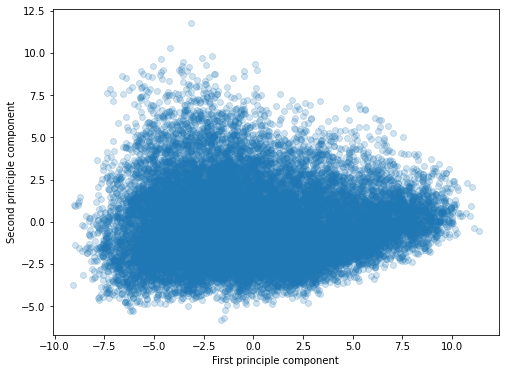

In [94]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],alpha=0.2)
plt.xlabel("First principle component")
plt.ylabel("Second principle component")

# Modelling

## Multiple linear regression model

In [95]:
## create X and y for multi linear regression
X = X_train[['generation fossil hard coal', 'total load actual','generation fossil gas',
             'generation fossil brown coal/lignite','wind load ratio']]
y = y_train
X_val = X_val[['generation fossil hard coal', 'total load actual','generation fossil gas',
             'generation fossil brown coal/lignite','wind load ratio']]

In [96]:
from sklearn import linear_model
import statsmodels.api as sm

In [97]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X, y)

print('Intercept: \n', lr_model.intercept_)
print('Coefficients: \n', lr_model.coef_)

Intercept: 
 26.844117940720245
Coefficients: 
 [ 1.66428800e-03  6.77174145e-04  1.21286549e-03 -3.57244320e-04
 -5.93585218e+00]


In [98]:
prediction = lr_model.predict(X)
prediction

array([51.67945517, 57.0018581 , 54.15647636, ..., 65.86573571,
       63.07268724, 63.46694373])

                           Actual  Predicted
time                                        
2016-08-16 00:00:00+00:00   52.75  51.679455
2018-04-23 07:00:00+00:00   62.29  57.001858
2016-04-06 09:00:00+00:00   42.19  54.156476
2015-01-26 15:00:00+00:00   74.44  67.970761
2017-03-05 00:00:00+00:00   38.32  54.695751
...                           ...        ...
2016-07-11 21:00:00+00:00   49.57  60.413396
2016-07-06 15:00:00+00:00   52.37  63.786748
2017-11-07 16:00:00+00:00   66.19  65.865736
2015-06-28 11:00:00+00:00   67.94  63.072687
2018-07-20 07:00:00+00:00   72.67  63.466944

[21038 rows x 2 columns]


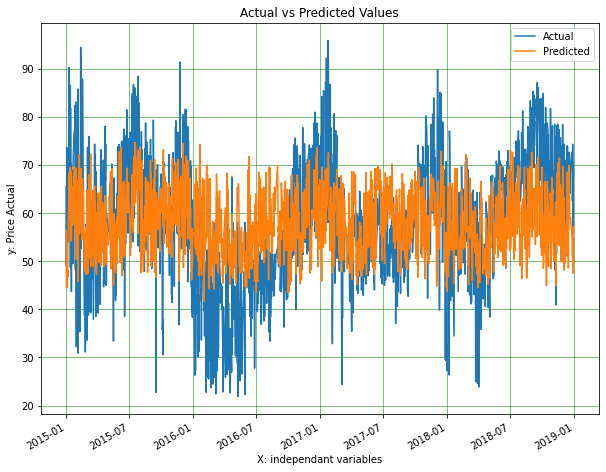

In [99]:
lr_pred_X = lr_model.predict(X)
lr_pred_X
comparison_X_lr = pd.DataFrame({'Actual': y, 'Predicted': lr_pred_X})
print(comparison_X_lr)
comparison_X1_lr = comparison_X_lr.head(2000)
comparison_X1_lr.plot(kind="line", figsize=(10,8))
plt.title('Actual vs Predicted Values')
plt.xlabel("X: independant variables") 
plt.ylabel("y: Price Actual")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [100]:
import sklearn.metrics as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

In [101]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_train, lr_pred_X), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_train, lr_pred_X), 2)) 
mse_lr = mean_squared_error(y_train, lr_pred_X)
rmse_lr = mse_lr**.5
print("RMSE =", round(rmse_lr))

Mean absolute error = 8.64
Mean squared error = 120.41
Median absolute error = 7.14
Explain variance score = 0.28
R2 score = 0.28
RMSE = 11


## Performance evaluation

In [102]:
# prediction on the validation set
y_val_predict = lr_model.predict(X_val)
print("Mean absolute error =", round(sm.mean_absolute_error(y_val, y_val_predict), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val, y_val_predict), 2)) 
mse_lr = mean_squared_error(y_val, y_val_predict)
rmse_lr = mse_lr**.5
print("RMSE =", round(rmse_lr))  

Mean absolute error = 8.59
Mean squared error = 119.81
Median absolute error = 7.13
Explain variance score = 0.28
R2 score = 0.28
RMSE = 11


In [170]:
from sklearn.model_selection import cross_val_score

#calculate 5-fold RMSE scores
linear_regression_scores = np.sqrt(-cross_val_score(lr_model,X,y, scoring="neg_mean_squared_error", cv=5))
# print mean and std of the scores
print("Linear regression: mean",linear_regression_scores.mean(), "sd:", linear_regression_scores.std())

ValueError: Found input variables with inconsistent numbers of samples: [21038, 35064]

Linear regression: mean 10.97597416727016 sd: 0.12443378399608737


## Random forest model

In [104]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_features=60, max_leaf_nodes=None)                            
rf_model.fit(X_train,y_train);
rf_pred_X = rf_model.predict(X_train)

                           Actual  Predicted
time                                        
2016-08-16 00:00:00+00:00   52.75    55.0057
2018-04-23 07:00:00+00:00   62.29    62.0090
2016-04-06 09:00:00+00:00   42.19    42.0010
2015-01-26 15:00:00+00:00   74.44    73.5110
2017-03-05 00:00:00+00:00   38.32    40.9440
...                           ...        ...
2016-07-11 21:00:00+00:00   49.57    50.2652
2016-07-06 15:00:00+00:00   52.37    52.7142
2017-11-07 16:00:00+00:00   66.19    66.1992
2015-06-28 11:00:00+00:00   67.94    67.1150
2018-07-20 07:00:00+00:00   72.67    71.3062

[21038 rows x 2 columns]


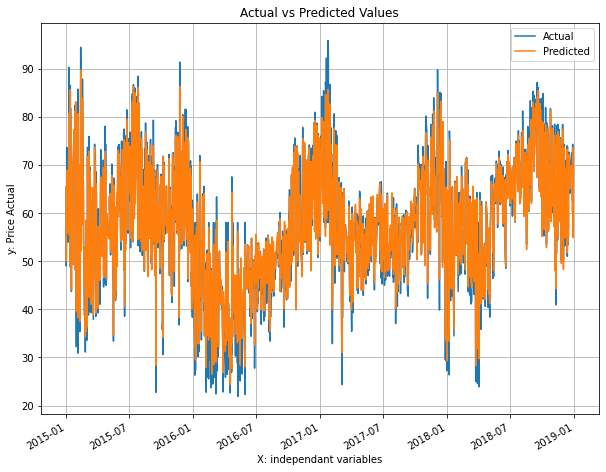

In [105]:
comparison_X_rf = pd.DataFrame({'Actual': y_train, 'Predicted': rf_pred_X})
print(comparison_X_rf)
comparison_X_rf1 = comparison_X_rf.head(2000)
comparison_X_rf1.plot(kind="line", figsize=(10,8))

plt.title('Actual vs Predicted Values')
plt.xlabel("X: independant variables") 
plt.ylabel("y: Price Actual")
plt.grid()
plt.show()

In [106]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_train, rf_pred_X), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_train, rf_pred_X), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_train, rf_pred_X), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_train, rf_pred_X), 2)) 
print("R2 score =", round(sm.r2_score(y_train, rf_pred_X), 2))
mse_rf = mean_squared_error(y_train, rf_pred_X)
rmse_rf = mse_rf**.5
print("RMSE =", round(rmse_rf))

Mean absolute error = 1.63
Mean squared error = 5.4
Median absolute error = 1.11
Explain variance score = 0.97
R2 score = 0.97
RMSE = 2


## Performance evaluation

                           Actual  Predicted
time                                        
2015-09-10 21:00:00+00:00   65.66    60.2464
2018-09-20 07:00:00+00:00   81.89    81.6502
2016-01-04 13:00:00+00:00   49.84    48.0886
2015-03-03 18:00:00+00:00   83.80    72.1732
2015-06-25 18:00:00+00:00   73.15    74.3908
...                           ...        ...
2018-07-07 16:00:00+00:00   64.38    63.2943
2016-10-07 17:00:00+00:00   68.80    59.7554
2017-07-14 09:00:00+00:00   62.98    62.9109
2015-11-27 03:00:00+00:00   41.12    45.3604
2016-02-20 10:00:00+00:00   42.02    42.6457

[7013 rows x 2 columns]


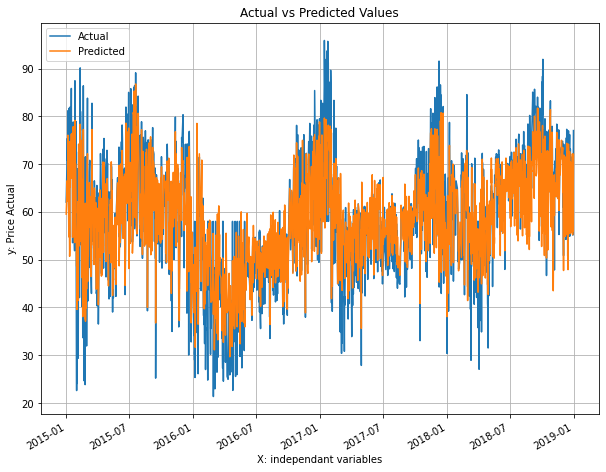

Mean absolute error = 4.37
Mean squared error = 38.19
Median absolute error = 3.0
Explain variance score = 0.77
R2 score = 0.77
RMSE = 6


In [107]:
# random forest model on test data
rf_pred_X_test = rf_model.predict(X_test)

comparison_X_rf_test = pd.DataFrame({'Actual': y_test, 'Predicted': rf_pred_X_test})
print(comparison_X_rf_test)
comparison_X_rf1_test = comparison_X_rf_test.head(2000)
comparison_X_rf1_test.plot(kind="line", figsize=(10,8))

plt.title('Actual vs Predicted Values')
plt.xlabel("X: independant variables") 
plt.ylabel("y: Price Actual")
plt.grid()
plt.show()

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, rf_pred_X_test), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, rf_pred_X_test), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, rf_pred_X_test), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, rf_pred_X_test), 2)) 
print("R2 score =", round(sm.r2_score(y_test, rf_pred_X_test), 2))
mse_rf_test = mean_squared_error(y_test, rf_pred_X_test)
rmse_rf_test = mse_rf_test**.5
print("RMSE =", round(rmse_rf_test))

## XGBooter model

In [108]:
# pip install xgboost

In [109]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=7, subsample=0.7, 
                             colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10)
xgb_model.fit(X_train,y_train);
xgb_pred_X = xgb_model.predict(X_train)

                           Actual  Predicted
time                                        
2016-08-16 00:00:00+00:00   52.75  51.835960
2018-04-23 07:00:00+00:00   62.29  60.486675
2016-04-06 09:00:00+00:00   42.19  45.148384
2015-01-26 15:00:00+00:00   74.44  74.192291
2017-03-05 00:00:00+00:00   38.32  41.859692
...                           ...        ...
2016-07-11 21:00:00+00:00   49.57  48.823666
2016-07-06 15:00:00+00:00   52.37  58.110924
2017-11-07 16:00:00+00:00   66.19  64.114807
2015-06-28 11:00:00+00:00   67.94  66.995377
2018-07-20 07:00:00+00:00   72.67  63.473866

[21038 rows x 2 columns]


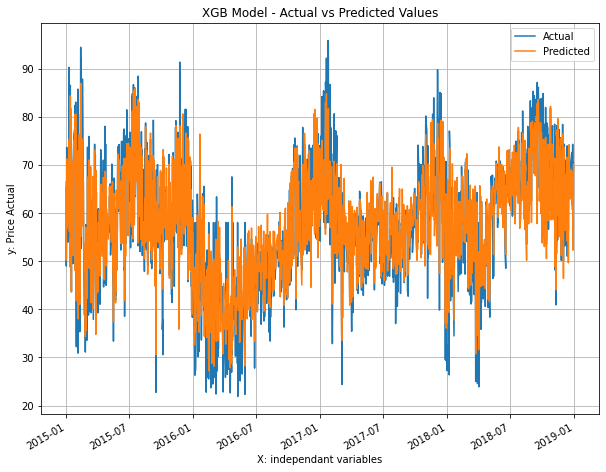

In [110]:
xgb_comparison_X = pd.DataFrame({'Actual': y_train, 'Predicted': xgb_pred_X})
print(xgb_comparison_X)
xgb_comparison_X1 = xgb_comparison_X.head(2000)
xgb_comparison_X1.plot(kind="line", figsize=(10,8))
plt.title('XGB Model - Actual vs Predicted Values')
plt.xlabel("X: independant variables") 
plt.ylabel("y: Price Actual")
plt.grid()
plt.show()

In [111]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_train, xgb_pred_X), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_train, xgb_pred_X), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_train, xgb_pred_X), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_train, xgb_pred_X), 2)) 
print("R2 score =", round(sm.r2_score(y_train, xgb_pred_X), 2))

mse_xgb = mean_squared_error(y_train, xgb_pred_X)
rmse_xgb = mse_xgb**.5
print("RMSE =", round(rmse_xgb))

Mean absolute error = 3.62
Mean squared error = 23.52
Median absolute error = 2.75
Explain variance score = 0.86
R2 score = 0.86
RMSE = 5


## Performance evaluation

                           Actual  Predicted
time                                        
2015-09-10 21:00:00+00:00   65.66    60.2464
2018-09-20 07:00:00+00:00   81.89    81.6502
2016-01-04 13:00:00+00:00   49.84    48.0886
2015-03-03 18:00:00+00:00   83.80    72.1732
2015-06-25 18:00:00+00:00   73.15    74.3908
...                           ...        ...
2018-07-07 16:00:00+00:00   64.38    63.2943
2016-10-07 17:00:00+00:00   68.80    59.7554
2017-07-14 09:00:00+00:00   62.98    62.9109
2015-11-27 03:00:00+00:00   41.12    45.3604
2016-02-20 10:00:00+00:00   42.02    42.6457

[7013 rows x 2 columns]


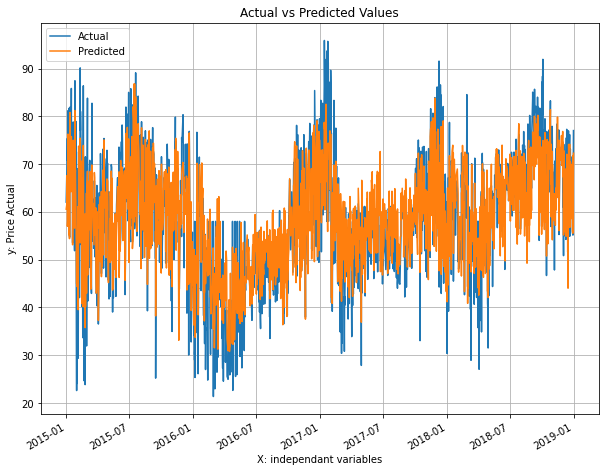

Mean absolute error = 4.88
Mean squared error = 44.11
Median absolute error = 3.54
Explain variance score = 0.73
R2 score = 0.73
RMSE = 7


In [112]:
# XGB model on test data
xgb_pred_X_test = xgb_model.predict(X_test)

comparison_X_xgb_test = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_pred_X_test})
print(comparison_X_rf_test)
comparison_X_xgb1_test = comparison_X_xgb_test.head(2000)
comparison_X_xgb1_test.plot(kind="line", figsize=(10,8))

plt.title('Actual vs Predicted Values')
plt.xlabel("X: independant variables") 
plt.ylabel("y: Price Actual")
plt.grid()
plt.show()

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, xgb_pred_X_test), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, xgb_pred_X_test), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, xgb_pred_X_test), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, xgb_pred_X_test), 2)) 
print("R2 score =", round(sm.r2_score(y_test, xgb_pred_X_test), 2))
mse_xgb_test = mean_squared_error(y_test, xgb_pred_X_test)
rmse_xgb_test = mse_xgb_test**.5
print("RMSE =", round(rmse_xgb_test))

## Time Series Model

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [114]:
timesteps = energy.index.to_numpy()
prices = energy["price actual"].to_numpy()

timesteps[:10], prices[:10]

(array([Timestamp('2014-12-31 23:00:00+0000', tz='UTC'),
        Timestamp('2015-01-01 00:00:00+0000', tz='UTC'),
        Timestamp('2015-01-01 01:00:00+0000', tz='UTC'),
        Timestamp('2015-01-01 02:00:00+0000', tz='UTC'),
        Timestamp('2015-01-01 03:00:00+0000', tz='UTC'),
        Timestamp('2015-01-01 04:00:00+0000', tz='UTC'),
        Timestamp('2015-01-01 05:00:00+0000', tz='UTC'),
        Timestamp('2015-01-01 06:00:00+0000', tz='UTC'),
        Timestamp('2015-01-01 07:00:00+0000', tz='UTC'),
        Timestamp('2015-01-01 08:00:00+0000', tz='UTC')], dtype=object),
 array([65.41, 64.92, 64.48, 59.32, 56.04, 53.63, 51.73, 51.43, 48.98,
        54.2 ]))

In [115]:
# Create train and test splits for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test
X_train_prep, y_train_prep = timesteps[:split_size], prices[:split_size]
X_test_prep, y_test_prep = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(21038, 7013, 21038, 7013)

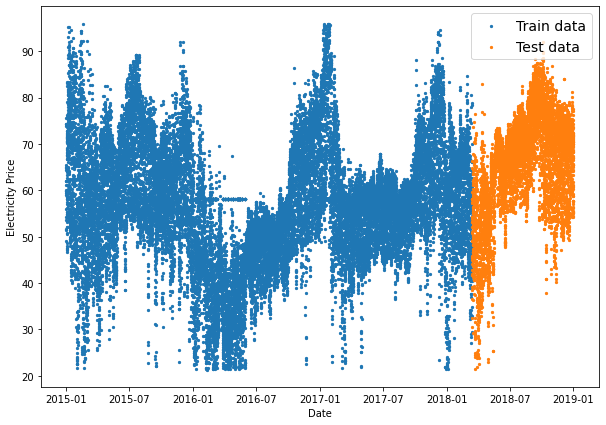

In [116]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train_prep, y_train_prep, s=5, label="Train data")
plt.scatter(X_test_prep, y_test_prep, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Electricity Price")
plt.legend(fontsize=14)
plt.show();

In [117]:
# Create a naïve forecast
naive_forecast = y_test_prep[:-1] 
naive_forecast[:10], naive_forecast[-10:]

(array([50.95, 59.73, 50.89, 45.94, 30.59, 32.54, 58.02, 58.02, 58.02,
        58.02]),
 array([71.8 , 71.95, 70.85, 71.36, 75.13, 77.61, 77.02, 76.16, 74.3 ,
        69.89]))

In [118]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Electricity Price")
  if label:
    plt.legend(fontsize=14) 
  plt.grid(True)

Reference: https://machinelearningmastery.com/time-series-data-visualization-with-python/

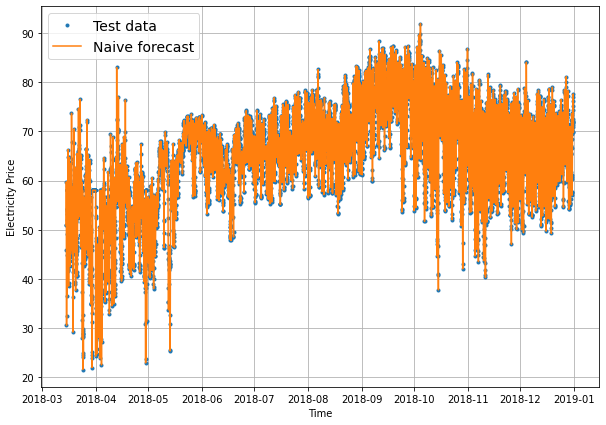

In [119]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test_prep, values=y_test_prep, label="Test data")
plot_time_series(timesteps=X_test_prep[1:], values=naive_forecast, format="-",label="Naive forecast");

In [120]:
import tensorflow as tf
from tensorflow.keras import layers

In [121]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [122]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [123]:
naive_results = evaluate_preds(y_true=y_test_prep[1:],
                               y_pred=naive_forecast)
naive_results

Metal device set to: Apple M1


2022-05-23 18:27:28.548489: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-23 18:27:28.548767: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


{'mae': 2.1060967,
 'mse': 10.838866,
 'rmse': 3.2922435,
 'mape': 3.4782794,
 'mase': 1.0004523}

In [124]:
def evaluate_preds_test(y_test, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

## LSTM

In [125]:
HORIZON = 24 # predict next 24 hours
WINDOW_SIZE = 168 # use last 1 week timesteps to predict the horizon

In [126]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [127]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=24, horizon=24):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [128]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(35017, 35017)

In [129]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [65.41 64.92 64.48 59.32 56.04 53.63 51.73 51.43 48.98 54.2  58.94 59.86
 60.12 62.05 62.06 59.76 61.18 64.74 74.26 74.24 75.64 73.92 70.53 64.13] -> Label: [64.02 58.46 54.7  54.91 53.07 54.23 58.22 67.55 70.33 71.26 75.86 73.65
 74.19 71.51 71.04 71.24 70.64 72.85 82.55 83.33 83.23 79.06 76.2  71.75]
Window: [64.92 64.48 59.32 56.04 53.63 51.73 51.43 48.98 54.2  58.94 59.86 60.12
 62.05 62.06 59.76 61.18 64.74 74.26 74.24 75.64 73.92 70.53 64.13 64.02] -> Label: [58.46 54.7  54.91 53.07 54.23 58.22 67.55 70.33 71.26 75.86 73.65 74.19
 71.51 71.04 71.24 70.64 72.85 82.55 83.33 83.23 79.06 76.2  71.75 66.82]
Window: [64.48 59.32 56.04 53.63 51.73 51.43 48.98 54.2  58.94 59.86 60.12 62.05
 62.06 59.76 61.18 64.74 74.26 74.24 75.64 73.92 70.53 64.13 64.02 58.46] -> Label: [54.7  54.91 53.07 54.23 58.22 67.55 70.33 71.26 75.86 73.65 74.19 71.51
 71.04 71.24 70.64 72.85 82.55 83.33 83.23 79.06 76.2  71.75 66.82 63.35]


In [130]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [131]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(28013, 7004, 28013, 7004)

In [132]:
train_windows[:5], train_labels[:5]

(array([[65.41, 64.92, 64.48, 59.32, 56.04, 53.63, 51.73, 51.43, 48.98,
         54.2 , 58.94, 59.86, 60.12, 62.05, 62.06, 59.76, 61.18, 64.74,
         74.26, 74.24, 75.64, 73.92, 70.53, 64.13],
        [64.92, 64.48, 59.32, 56.04, 53.63, 51.73, 51.43, 48.98, 54.2 ,
         58.94, 59.86, 60.12, 62.05, 62.06, 59.76, 61.18, 64.74, 74.26,
         74.24, 75.64, 73.92, 70.53, 64.13, 64.02],
        [64.48, 59.32, 56.04, 53.63, 51.73, 51.43, 48.98, 54.2 , 58.94,
         59.86, 60.12, 62.05, 62.06, 59.76, 61.18, 64.74, 74.26, 74.24,
         75.64, 73.92, 70.53, 64.13, 64.02, 58.46],
        [59.32, 56.04, 53.63, 51.73, 51.43, 48.98, 54.2 , 58.94, 59.86,
         60.12, 62.05, 62.06, 59.76, 61.18, 64.74, 74.26, 74.24, 75.64,
         73.92, 70.53, 64.13, 64.02, 58.46, 54.7 ],
        [56.04, 53.63, 51.73, 51.43, 48.98, 54.2 , 58.94, 59.86, 60.12,
         62.05, 62.06, 59.76, 61.18, 64.74, 74.26, 74.24, 75.64, 73.92,
         70.53, 64.13, 64.02, 58.46, 54.7 , 54.91]]),
 array([[64.02, 58

In [133]:
tf.random.set_seed(42)
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation="relu")(x) 
output = layers.Dense(HORIZON)(x)
LSTM_model = tf.keras.Model(inputs=inputs, outputs=output, name="model_lstm")

LSTM_model.summary()
# Compile model
LSTM_model.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

LSTM_model.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels))

Model: "model_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 lambda (Lambda)             (None, 1, 24)             0         
                                                                 
 lstm (LSTM)                 (None, 128)               78336     
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
Total params: 81,432
Trainable params: 81,432
Non-trainable params: 0
_________________________________________________________________


2022-05-23 18:27:28.832739: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-23 18:27:29.325284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-23 18:27:31.609487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [134]:
test_windows[0]

array([41.71, 48.59, 57.09, 64.1 , 66.06, 66.29, 62.69, 60.76, 58.76,
       56.81, 53.47, 55.57, 58.54, 66.12, 78.84, 78.3 , 70.08, 60.07,
       53.76, 49.61, 47.8 , 43.92, 42.9 , 42.67])

In [135]:
test_labels[0]

array([44.55, 46.47, 58.48, 61.66, 61.33, 59.58, 58.54, 54.45, 49.23,
       45.74, 40.51, 34.76, 32.82, 29.42, 50.95, 59.73, 50.89, 45.94,
       30.59, 32.54, 58.02, 58.02, 58.02, 58.02])

In [136]:
LSTM_model.evaluate(test_windows, test_labels)

219/219 [==============================] - 1s 5ms/step - loss: 4.1479


4.147863864898682

In [137]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [138]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0: 
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [139]:
# Make predictions with LSTM model
LSTM_model_preds = make_preds(LSTM_model, test_windows)
LSTM_model_preds[:10]

2022-05-23 18:31:05.799814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(10, 24), dtype=float32, numpy=
array([[45.816193, 52.10647 , 60.125546, 66.023865, 68.361305, 67.98822 ,
        63.762283, 61.765327, 60.238052, 59.6373  , 57.672916, 57.36802 ,
        60.335323, 66.63255 , 73.39198 , 73.84849 , 69.16687 , 61.397545,
        54.87306 , 51.3504  , 49.616478, 46.988735, 44.773727, 45.24629 ],
       [51.140938, 58.67139 , 66.23518 , 68.58746 , 68.526184, 67.644104,
        63.491276, 60.688057, 57.805584, 57.505875, 57.778683, 61.030045,
        68.20466 , 73.70416 , 74.35954 , 68.29952 , 61.368225, 55.86344 ,
        52.330624, 49.376026, 47.471123, 44.35877 , 42.324963, 46.15522 ],
       [53.51427 , 59.8096  , 64.28492 , 64.53479 , 62.461643, 61.124664,
        59.34247 , 56.78342 , 54.845905, 55.721447, 59.21197 , 65.38834 ,
        72.40343 , 73.25495 , 67.87341 , 60.00387 , 53.674202, 50.587337,
        48.662563, 46.168255, 45.236843, 43.430023, 44.48051 , 48.872757],
       [64.40641 , 67.25992 , 68.52025 , 67.48056 , 64.4021

In [140]:
# Evaluate LSTM_model preds
LSTM_model_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=LSTM_model_preds)
LSTM_model_results

{'mae': 4.1478634,
 'mse': 33.80058,
 'rmse': 4.962771,
 'mape': 7.090773,
 'mase': 1.968098}

### Multivariate_LSTM

In [141]:
#pip install keras

In [142]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras import Sequential
from keras.layers import SimpleRNN, Dense

In [143]:
from sklearn.preprocessing import MinMaxScaler

In [144]:
y1 = final_df['price actual']
X1 = final_df.drop('price actual', axis=1)

In [145]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X1)

In [146]:
X_scaled

array([[0.73333333, 0.32932933, 0.39765662, ..., 0.        , 0.99337748,
        0.37907849],
       [0.73888889, 0.32832833, 0.43974175, ..., 0.        , 0.99337748,
        0.36447502],
       [0.73611111, 0.32332332, 0.3992109 , ..., 0.        , 0.99337748,
        0.36242497],
       ...,
       [0.30277778, 0.        , 0.65841703, ..., 0.        , 0.99337748,
        0.18827994],
       [0.30555556, 0.        , 0.60306074, ..., 0.        , 0.99337748,
        0.20969861],
       [0.29722222, 0.        , 0.64658058, ..., 0.        , 0.99337748,
        0.2252506 ]])

In [147]:
len(X_scaled)

35064

In [148]:
sc = MinMaxScaler()
y = y1.values
y_scaled = sc.fit_transform(y.reshape(-1,1))

In [149]:
y_scaled

array([[0.59056174],
       [0.58399249],
       [0.57809358],
       ...,
       [0.70974661],
       [0.65062341],
       [0.65048934]])

In [150]:
features = X_scaled
target = y_scaled

In [151]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.73333333, 0.32932933, 0.39765662, 0.57674363, 0.51310861,
          0.56038961, 0.5255    , 0.24424437, 0.99354839, 0.32258065,
          0.39473684, 0.00845994, 0.27477477, 0.45237251, 0.00291295,
          0.45327581, 0.34412712, 0.31966571, 0.46649297, 0.41323812,
          0.43164106, 0.36485978, 1.        , 0.46666667, 0.16111111,
          0.        , 0.        , 0.99337748, 0.06153688, 0.11499922,
          0.01365946, 0.96629213, 0.        , 0.62777778, 0.        ,
          0.        , 0.99337748, 0.06490101, 0.0664959 , 0.06099564,
          0.63      , 0.05555556, 0.85833333, 0.        , 0.        ,
          0.99337748, 0.05218855, 0.09184783, 0.02672805, 0.7311828 ,
          0.06666667, 0.05833333, 0.        , 0.        , 0.99337748,
          0.03885561, 0.03885561, 0.03575489, 0.75      , 0.02325581,
          0.17222222, 0.        , 0.        , 0.99337748, 0.37907849],
         [0.73888889, 0.32832833, 0.43974175, 0.56884795, 0.51310861,
          0.5974026

In [152]:
x_train_prep,x_test_prep,y_train_prep,y_test_prep = train_test_split(features, target, test_size=0.2, random_state=123,shuffle = False)

In [153]:
x_train_prep.shape

(28051, 65)

In [154]:
x_test_prep.shape

(7013, 65)

In [155]:
y_train_prep

array([[0.59056174],
       [0.58399249],
       [0.57809358],
       ...,
       [0.17964875],
       [0.1536399 ],
       [0.10805738]])

In [156]:
win_length=168
batch_size=32
num_features=65
train_generator = TimeseriesGenerator(x_train_prep,y_train_prep,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test_prep,y_test_prep,length=win_length,sampling_rate=1,batch_size=batch_size)

In [157]:
len(test_generator)

214

In [158]:
mul_lstm = tf.keras.Sequential()
mul_lstm.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
mul_lstm.add(tf.keras.layers.LeakyReLU(alpha=0.5))

mul_lstm.add(tf.keras.layers.LSTM(128,return_sequences=True))
mul_lstm.add(tf.keras.layers.LeakyReLU(alpha=0.5))
mul_lstm.add(tf.keras.layers.Dropout(0.3))

mul_lstm.add(tf.keras.layers.LSTM(64,return_sequences=False))
mul_lstm.add(tf.keras.layers.Dropout(0.3))
mul_lstm.add(tf.keras.layers.Dense(1))

In [159]:
mul_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 168, 128)          99328     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 168, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 168, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 168, 128)          0         
                                                                 
 dropout (Dropout)           (None, 168, 128)          0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [160]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    mode='min')

In [161]:
len(test_generator)

214

In [162]:
mul_lstm.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])



history = mul_lstm.fit_generator(train_generator,
                                 epochs=50,
                                 validation_data = test_generator,
                                 shuffle=False,
                                 callbacks=[early_stopping])

Epoch 1/50


/var/folders/66/qq6y4h9x2v91kpgp9hv1rh3r0000gn/T/ipykernel_27119/1711991041.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = mul_lstm.fit_generator(train_generator,
2022-05-23 18:31:08.767668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-23 18:31:09.063578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-23 18:31:09.340699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-23 18:31:09.581136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-23 18:31:09.842270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113]

872/872 [==============================] - ETA: 0s - loss: 0.0168 - root_mean_squared_error: 0.1298

2022-05-23 18:32:39.285842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-23 18:32:39.392578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-23 18:32:39.621657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-23 18:32:39.836437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


872/872 [==============================] - 105s 116ms/step - loss: 0.0168 - root_mean_squared_error: 0.1298 - val_loss: 0.0504 - val_root_mean_squared_error: 0.2245
Epoch 2/50
872/872 [==============================] - 98s 112ms/step - loss: 0.0127 - root_mean_squared_error: 0.1129 - val_loss: 0.0381 - val_root_mean_squared_error: 0.1953


In [163]:
predictions = mul_lstm.predict_generator(test_generator) 

/var/folders/66/qq6y4h9x2v91kpgp9hv1rh3r0000gn/T/ipykernel_27119/2773137647.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = mul_lstm.predict_generator(test_generator)
2022-05-23 18:34:30.492693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-23 18:34:30.583235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-23 18:34:30.806581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-23 18:34:31.026478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [164]:
len (predictions)

6845

In [165]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(y_test)],axis=1)

## Hyperparameter tuning

In [171]:
from sklearn.model_selection import RandomizedSearchCV

distributions = dict(n_estimators=range(1,200), max_features=(1,65), max_leaf_nodes=(10,100))      

# apply the randomised search
random_search = RandomizedSearchCV(rf_model, distributions, cv=10, 
                           scoring="neg_mean_squared_error", 
                           return_train_score=True, random_state=42, n_jobs=-1)

# fit to data
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(max_features=60),
                   n_jobs=-1,
                   param_distributions={'max_features': (1, 65),
                                        'max_leaf_nodes': (10, 100),
                                        'n_estimators': range(1, 200)},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [177]:
#check the best hyperparameter values
random_search.best_estimator_

# assign the best model to final_model object
final_model = random_search.best_estimator_

In [180]:
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)